In [11]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)
print(project_root)


c:\Users\HP\Desktop\Tenx_challenge_folder\Credit-Risk-Probability-Model-for-Alternative-Data-Week-4-Challenge-


In [10]:


import importlib.util
import os

module_path = r"C:\Users\HP\Desktop\Tenx_challenge_folder\Credit-Risk-Probability-Model-for-Alternative-Data-Week-4-Challenge-\src\data_loader.py"

print(os.path.exists(module_path))  # Should be True

spec = importlib.util.spec_from_file_location("data_loader", module_path)

if spec is None:
    raise ImportError("Failed to load module spec — check file path!")

data_loader = importlib.util.module_from_spec(spec)
spec.loader.exec_module(data_loader)

load_data = data_loader.load_data



True


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as platform
import seaborn as sns

In [12]:
df=load_data(r"C:\Users\HP\Desktop\Tenx_challenge_folder\Credit-Risk-Probability-Model-for-Alternative-Data-Week-4-Challenge-\data\raw\data.csv")

### Data cleaning

In [23]:
print(df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [25]:
print(df.describe())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [26]:
print(df.duplicated().sum())

0


In [27]:
null_val_sums=df.isnull().sum()
pd.DataFrame({"Column":null_val_sums.index, "Number of Null Values": null_val_sums.values,
"Proportion":null_val_sums.values / len(df)})

,Column,Number of Null Values,Proportion
0,TransactionId,0,0.0
1,BatchId,0,0.0
2,AccountId,0,0.0
3,SubscriptionId,0,0.0
4,CustomerId,0,0.0
5,CurrencyCode,0,0.0
6,CountryCode,0,0.0
7,ProviderId,0,0.0
8,ProductId,0,0.0
9,ProductCategory,0,0.0


In [28]:
object_train_df=df.select_dtypes(include=['object'])
object_train_df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')

In [29]:
num_train_df=df.select_dtypes(include=['int','float'])
num_train_df.columns


Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

### Visualizing

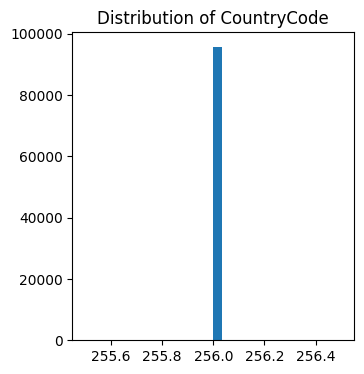

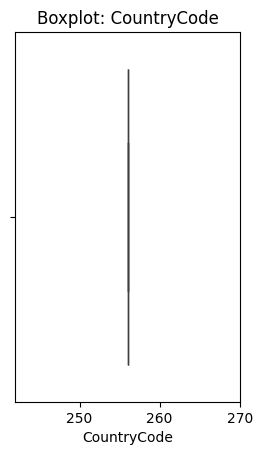

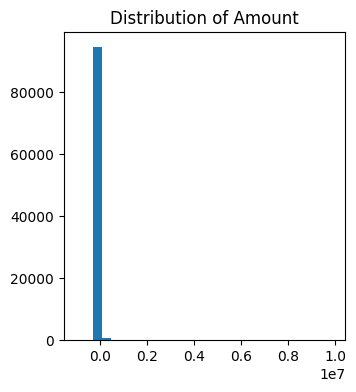

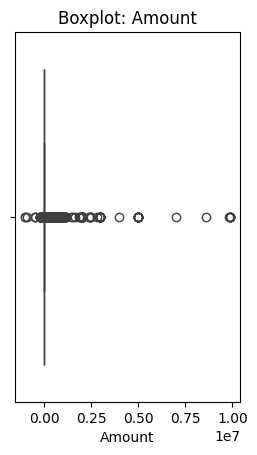

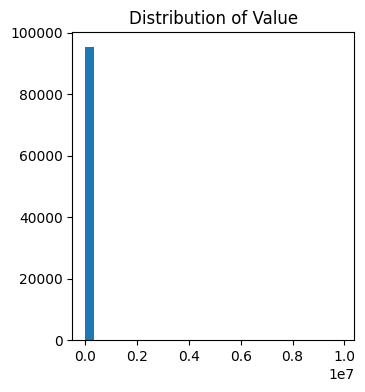

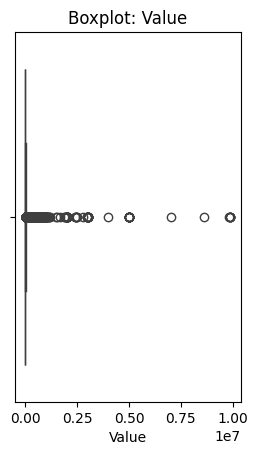

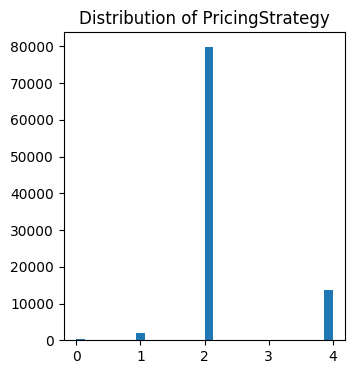

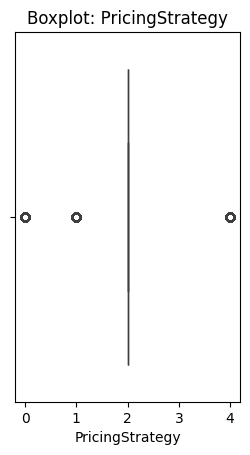

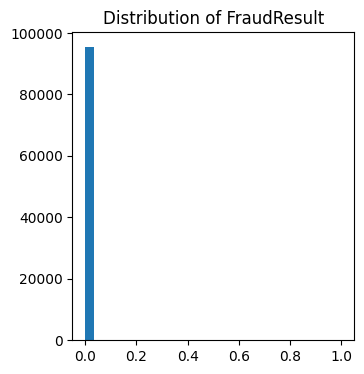

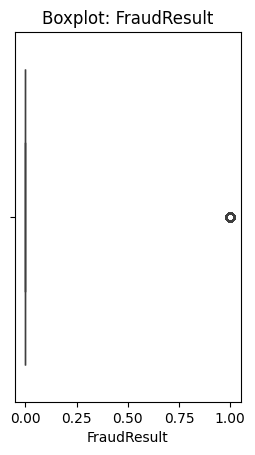

In [42]:
import matplotlib.pyplot as plt

numeric_cols=["CountryCode","Amount","Value","PricingStrategy","FraudResult"]

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

In [38]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

for col in numeric_cols:
    outliers, low, high = detect_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {low}, Upper Bound: {high}")
    print(f"Outliers detected: {len(outliers)}")


Column: CountryCode
Lower Bound: 256.0, Upper Bound: 256.0
Outliers detected: 0

Column: Amount
Lower Bound: -4325.0, Upper Bound: 7075.0
Outliers detected: 24441

Column: Value
Lower Bound: -6812.5, Upper Bound: 12087.5
Outliers detected: 9021

Column: PricingStrategy
Lower Bound: 2.0, Upper Bound: 2.0
Outliers detected: 15814

Column: FraudResult
Lower Bound: 0.0, Upper Bound: 0.0
Outliers detected: 193


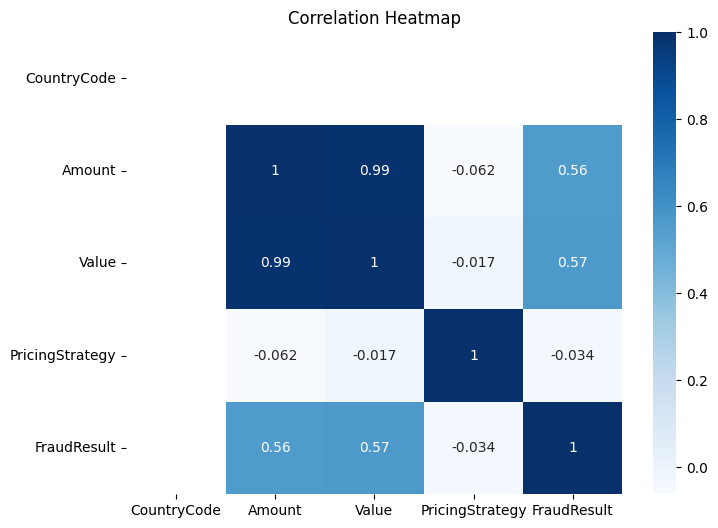

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [45]:
df["Amount"].fillna(df["Amount"].median(), inplace=True)

# Fill missing Loan_Amount_Term using mode (most common = 360)
df["Value"].fillna(df["Value"].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_28644\2151909614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Amount"].fillna(df["Amount"].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_28644\2151909614.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [49]:
df["Amount_log"] = np.log1p(df["Amount"])
df["Value_log"] = np.log1p(df["Value"])
df["PricingStrategy_log"] = np.log1p(df["PricingStrategy"])

c:\Users\HP\Desktop\Tenx_challenge_folder\Credit-Risk-Probability-Model-for-Alternative-Data-Week-4-Challenge-\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:

df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'Amount_log',
       'Value_log', 'PricingStrategy_log'],
      dtype='object')

In [51]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [53]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'Amount_log',
       'Value_log', 'PricingStrategy_log'],
      dtype='object')

In [54]:
def woe_iv(data, feature, target):
    """Compute WOE and IV for a given feature."""
    lst = []

    for val in data[feature].unique():
        good = len(data[(data[feature] == val) & (data[target] == 0)])
        bad = len(data[(data[feature] == val) & (data[target] == 1)])
        lst.append([val, good, bad])

    woe_df = pd.DataFrame(lst, columns=["Value", "Good", "Bad"])

    # calculate distribution
    woe_df["Distr_Good"] = woe_df["Good"] / woe_df["Good"].sum()
    woe_df["Distr_Bad"] = woe_df["Bad"] / woe_df["Bad"].sum()

    # avoid division by zero
    woe_df["Distr_Good"] = woe_df["Distr_Good"].replace(0, 0.00001)
    woe_df["Distr_Bad"] = woe_df["Distr_Bad"].replace(0, 0.00001)

    # compute WOE
    woe_df["WOE"] = np.log(woe_df["Distr_Good"] / woe_df["Distr_Bad"])

    # compute IV
    woe_df["IV"] = (woe_df["Distr_Good"] - woe_df["Distr_Bad"]) * woe_df["WOE"]
    iv = woe_df["IV"].sum()

    return woe_df, iv

In [60]:
#1. Prepare Target Variable (Loan_Status → 0/1)
# Convert Loan_Status: Y = Good (0), N = Bad (1)
df["FraudResult"] = df["FraudResult"].map({"Y": 0, "N": 1})

print(df["FraudResult"].value_counts())

Series([], Name: count, dtype: int64)


In [18]:
import pandas as pd
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("FraudResult")  

for col in numeric_cols:
    df[col + "_bin"] = pd.qcut(df[col], q=5, duplicates="drop")

In [33]:
"woe_iv" in globals()


True

In [34]:
iv_dict = {}
def woe_iv(df, feature, target):
    # your WOE & IV logic
    return woe_table, iv

for col in df.columns:
    if "_bin" in col:
        woe_table, iv = woe_iv(df, col, "FraudResult")
        iv_dict[col] = iv
        print(f"IV for {col}: {iv:.4f}")

# Rank features by IV
iv_rank = pd.DataFrame(iv_dict.items(), columns=["Feature", "IV"]).sort_values("IV", ascending=False)
print("\nRanked IV:")
print(iv_rank)

NameError: name 'woe_table' is not defined

In [16]:
def iv_categorical(df, feature, target="Loan_Status_Binary"):
    temp = df[[feature, target]].copy()
    temp[feature] = temp[feature].astype(str)

    grouped = temp.groupby(feature)[target].agg(["count", "sum"])
    grouped.columns = ["total", "bad"]

    grouped["good"] = grouped["total"] - grouped["bad"]

    # distributions
    grouped["good_dist"] = grouped["good"] / grouped["good"].sum()
    grouped["bad_dist"] = grouped["bad"] / grouped["bad"].sum()

    # avoid division by zero
    grouped["good_dist"] = grouped["good_dist"].replace(0, 1e-9)
    grouped["bad_dist"] = grouped["bad_dist"].replace(0, 1e-9)

    # WOE + IV
    grouped["WOE"] = np.log(grouped["good_dist"] / grouped["bad_dist"])
    grouped["IV"] = (grouped["good_dist"] - grouped["bad_dist"]) * grouped["WOE"]

    total_iv = grouped["IV"].sum()

    return grouped.reset_index(), total_iv

In [35]:
# ---------------------------------------
# COMPUTE IV FOR ALL CATEGORICAL FEATURES
# ---------------------------------------
# ---------------------------------------
# PREPARE TARGET (0 = Good, 1 = Bad)
# ---------------------------------------
df["Loan_Status_Binary"] = df["Loan_Status"].map({"Y": 0, "N": 1})

# ---------------------------------------
# DROP Loan_ID (identifier, not predictive)
# ---------------------------------------
if "Loan_ID" in df.columns:
    df = df.drop(columns=["Loan_ID"])

    
# SELECT *CATEGORICAL* VARIABLES
# ---------------------------------------
cat_cols = df.select_dtypes(include="object").columns.tolist()
# Remove target
cat_cols.remove("Loan_Status")

iv_results = []

for col in cat_cols:
    _, iv = iv_categorical(df, col)
    iv_results.append([col, iv])



iv_df = pd.DataFrame(iv_results, columns=["Categorical_Feature", "IV"]).sort_values("IV", ascending=False)

# ---------------------------------------
# SAVE IV TABLE
# ---------------------------------------
iv_df.to_excel("categorical_iv_scores.xlsx", index=False)

print("IV scores for categorical variables:")
print(iv_df)
print("\nSaved as categorical_iv_scores.xlsx")

KeyError: 'Loan_Status'

In [ ]:
# -----------------------------------------------------------
# APPLY WOE TRANSFORMATION
# -----------------------------------------------------------
df_woe = df.copy()

for col in iv_dict.keys():
    woe_table, iv = woe_iv(df, col, "Loan_Status_Binary")
    woe_map = dict(zip(woe_table["Value"], woe_table["WOE"]))
    df_woe[col + "_WOE"] = df[col].map(woe_map)

In [ ]:
# Keep only WOE columns
model_features = [col for col in df_woe.columns if col.endswith("_WOE")]

X = df_woe[model_features]
y = df_woe["Loan_Status_Binary"]

In [36]:
from sklearn.model_selection import train_test_split   # Import function to split dataset into train and test sets
from sklearn.linear_model import LogisticRegression
# -----------------------------------------------------------
# TRAIN MODEL
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

NameError: name 'X' is not defined

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
# -----------------------------------------------------------
# MODEL EVALUATION
# -----------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [38]:
# Fix missing values after WOE encoding
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # works for numeric WOE values

X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

NameError: name 'X' is not defined

## All together

In [39]:

# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")


# -------------------------------------------------------------
# 1. LOAD DATA
# -------------------------------------------------------------
# Example: replace this with your own Excel load code
# df = pd.read_excel(r"D:\Emma\feature_engineering_woe_iv\data\loan.xlsx")

# Drop Loan_ID (not predictive)
if "Loan_ID" in df.columns:
    df = df.drop(columns=["Loan_ID"])

# Create binary target
df["Loan_Status_Binary"] = df["Loan_Status"].map({"Y": 0, "N": 1})


# -------------------------------------------------------------
# 2. FUNCTION: WOE + IV FOR CATEGORICAL VARIABLES
# -------------------------------------------------------------
def woe_iv_categorical(df, feature, target="Loan_Status_Binary"):
    temp = df[[feature, target]].copy()
    temp = temp[temp[feature].notna()]
    temp[feature] = temp[feature].astype(str)

    grouped = temp.groupby(feature)[target].agg(["count", "sum"])
    grouped.columns = ["total", "bad"]
    grouped["good"] = grouped["total"] - grouped["bad"]

    grouped["good_dist"] = grouped["good"] / grouped["good"].sum()
    grouped["bad_dist"] = grouped["bad"] / grouped["bad"].sum()

    # Avoid division by zero
    grouped["good_dist"] = grouped["good_dist"].replace(0, 1e-9)
    grouped["bad_dist"] = grouped["bad_dist"].replace(0, 1e-9)

    grouped["WOE"] = np.log(grouped["good_dist"] / grouped["bad_dist"])
    grouped["IV"] = (grouped["good_dist"] - grouped["bad_dist"]) * grouped["WOE"]

    return grouped.reset_index(), grouped["IV"].sum()


# -------------------------------------------------------------
# 3. WOE ENCODING FOR “Married”
# -------------------------------------------------------------
married_table, married_iv = woe_iv_categorical(df, "Married")
print("\nWOE Table for Married:")
print(married_table)
print("\nIV for Married:", married_iv)

# Map to WOE
married_woe_map = dict(zip(married_table["Married"].astype(str), married_table["WOE"]))
df["Married_WOE"] = df["Married"].astype(str).map(married_woe_map)


# -------------------------------------------------------------
# 4. IV FOR NUMERIC VARIABLES (automatic binning)
# -------------------------------------------------------------
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("Loan_Status_Binary")  # exclude target

def iv_numeric(df, feature, target="Loan_Status_Binary", bins=5):
    df2 = df[[feature, target]].copy()
    df2["bin"] = pd.qcut(df2[feature], q=bins, duplicates="drop")

    grouped = df2.groupby("bin")[target].agg(["count", "sum"])
    grouped.columns = ["total", "bad"]
    grouped["good"] = grouped["total"] - grouped["bad"]

    grouped["good_dist"] = grouped["good"] / grouped["good"].sum()
    grouped["bad_dist"] = grouped["bad"] / grouped["bad"].sum()

    grouped["good_dist"] = grouped["good_dist"].replace(0, 1e-9)
    grouped["bad_dist"] = grouped["bad_dist"].replace(0, 1e-9)

    grouped["WOE"] = np.log(grouped["good_dist"] / grouped["bad_dist"])
    grouped["IV"] = (grouped["good_dist"] - grouped["bad_dist"]) * grouped["WOE"]

    return grouped.reset_index(), grouped["IV"].sum()


numeric_iv_results = []

for col in numeric_cols:
    table, iv = iv_numeric(df, col)
    numeric_iv_results.append([col, iv])

numeric_iv_df = pd.DataFrame(numeric_iv_results, columns=["Feature", "IV"])


# -------------------------------------------------------------
# 5. IV FOR CATEGORICAL VARIABLES
# -------------------------------------------------------------
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols.remove("Loan_Status")  # remove target if object

cat_iv_results = []
for col in categorical_cols:
    table, iv = woe_iv_categorical(df, col)
    cat_iv_results.append([col, iv])

categorical_iv_df = pd.DataFrame(cat_iv_results, columns=["Feature", "IV"])


# -------------------------------------------------------------
# 6. COMBINE IV AND SELECT FEATURES
# -------------------------------------------------------------
combined_iv = pd.concat([categorical_iv_df, numeric_iv_df], ignore_index=True)
combined_iv = combined_iv.sort_values("IV", ascending=False)

print("\n\n=== Combined IV Ranking ===")
print(combined_iv)

# Keep variables with IV >= 0.02
selected_features = combined_iv[combined_iv["IV"] >= 0.02]["Feature"].tolist()
print("\nSelected Predictive Features (IV >= 0.02):")
print(selected_features)


# -------------------------------------------------------------
# 7. WOE TRANSFORM SELECTED FEATURES
# -------------------------------------------------------------
df_woe = df.copy()

# Categorical WOE
for f in selected_features:
    if f in categorical_cols:
        table, _ = woe_iv_categorical(df, f)
        woe_map = dict(zip(table[f].astype(str), table["WOE"]))
        df_woe[f + "_WOE"] = df[f].astype(str).map(woe_map)

# Numeric WOE
for f in selected_features:
    if f in numeric_cols:
        bins = pd.qcut(df[f], q=5, duplicates="drop")
        table, _ = iv_numeric(df, f)
        woe_map = dict(zip(table["bin"].astype(str), table["WOE"]))
        df_woe[f + "_bin"] = bins.astype(str)
        df_woe[f + "_WOE"] = df_woe[f + "_bin"].map(woe_map)

# Final list of WOE features
woe_features = [c for c in df_woe.columns if c.endswith("_WOE")]


# -------------------------------------------------------------
# 8. IMPUTE MISSING VALUES
# -------------------------------------------------------------
X = df_woe[woe_features]
y = df_woe["Loan_Status_Binary"]

imputer = SimpleImputer(strategy='median')  # works for numeric WOE
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


# -------------------------------------------------------------
# 9. LOGISTIC REGRESSION WITH WOE FEATURES
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)

print("\nLogistic Regression AUC Score:", auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KeyError: 'Loan_Status'